## Задача 2.1

Пусть задано две вектора ответов: $y$ — истинный вектор ответов для некоторой выборки, а также есть вектор ответов $\hat{y}~-~$ некоторой предсказательной модели. Наблюдатель хочет проверить гипотезу о том, что ровно в $25$% случаев модель дает заниженные оценки. 
Предложите метод проверки данной гипотезы: запишите задачу формально, 
предложите статистику для решения данной задачи на уровне значимости $\alpha = 0.05$.
Также найдите зависимость мощности данного критерия в зависимости от истинного
процента заниженных ответов.

##  Решение

Сначала проведем бинаризацию вектора предсказания. Будем заменять значение на $1$, если оно больше истиного, и на $0$ иначе. Далее, будем исользовать Биномиальный тест для гипотезой 

$H_0 : y_i \in \mathcal{Be}(0.25)$

Для этого нужно найти $\alpha$-квантиль $t_{\alpha}$ для $\mathcal{Binom}( len(y), 0.25)$. Количество единиц в векторе - наша статистика $T$. Если $T < t_a$, то данные не противоречат гипотезе, иначе гипотеза отвергается.

Найдем зависимость мощности критерия в зависимости от истинного процента заниженных ответов. Будем варьировать истиный процента. Так как биномиальное распределение дискретно, мощность будет единицей, если отклоняем основную гипотезу, иначе - 0.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns
import statsmodels
text_size = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = text_size

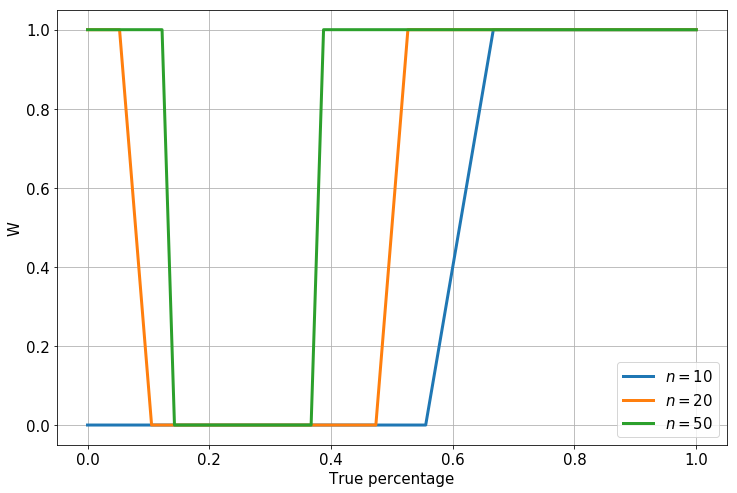

In [27]:
# Рассмотри для разных n
for n in [10, 20, 50]:
    p_values = []
    alpha = 0.05
    W = np.zeros(n)
    val = []
    true_procents = np.linspace(0, 1, n)

    for i, true_procent in enumerate(true_procents):
        p_value = st.binom_test(int(true_procent*n), n, p=0.25, alternative='two-sided')
        if p_value <= alpha:
            W[i] = 1
    plt.plot(true_procents, W, label=r'$n = $'+ str(n))
    plt.xlabel(r"True percentage")
    plt.ylabel(r"W")
    plt.legend()
    plt.grid()
plt.show()

Построим также более информативные графики. Найдем вероятности того, что случайная величина принимает значения, при которых $p_value < 0.05$ для каждого $n$ и сложим их.

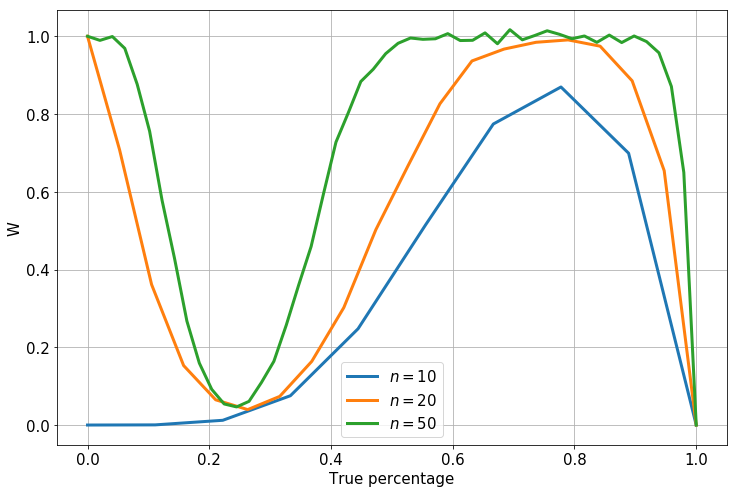

In [28]:
# Рассмотри для разных n
for n in [10, 20, 50]:
    p_values = []
    alpha = 0.05
    W = np.zeros(n)
    val = []
    true_procents = np.linspace(0, 1, n)

    for i, true_procent in enumerate(true_procents):
        p_value = st.binom_test(int(true_procent*n), n, p=0.25, alternative='two-sided')
        p_values.append(p_value)
        if p_value <= alpha:
            W[i] = 1
            val.append(i)
    w1 = []     
    for p in true_procents:
        s = 0
        for i in val:
            runs = 10000
            s += sum([1 for j in np.random.binomial(n, p, size=runs) if j==i])/runs
        w1.append(s)
    plt.plot(true_procents, w1, label=r'$n = $'+ str(n))
    plt.xlabel(r"True percentage")
    plt.ylabel(r"W")
    plt.legend()
    plt.grid()
plt.show()